## Importing Required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Importing dataset

In [3]:
Term = pd.read_csv("~/Desktop/bank-full.csv", sep=';')

## Displaying first few records in the dataset

In [4]:
Term.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Check data types

In [5]:
Term.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## Check total number of rows and columns

In [6]:
Term.shape

(45211, 17)

## Rows containing duplicate data

In [7]:
duplicateDFRow = Term[Term.duplicated()]
print(duplicateDFRow)

Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, y]
Index: []


## Check for values for each column

In [8]:
Term.count()

age          45211
job          45211
marital      45211
education    45211
default      45211
balance      45211
housing      45211
loan         45211
contact      45211
day          45211
month        45211
duration     45211
campaign     45211
pdays        45211
previous     45211
poutcome     45211
y            45211
dtype: int64

In [9]:
# Check for missing values

In [10]:
Term.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## renaming columns

In [11]:
Term = Term.rename(columns={'default': 'credit', 'housing': 'housingloan', 'loan': 'personalloan', 'y': 'termdeposit'})

## Summary for numeric features

In [12]:
Term.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## Check target variable distribution

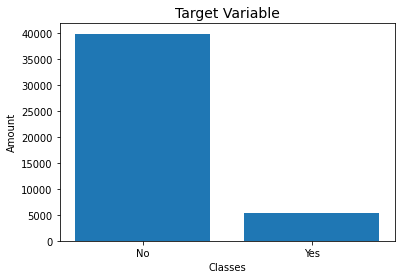

In [13]:
plt.bar(['No', 'Yes'], Term.termdeposit.value_counts().values)
plt.title('Target Variable', fontsize=14)
plt.xlabel('Classes')
plt.ylabel('Amount')
plt.show()

## Target variable is extremely imbalanced. This is important to remember when performing classification because even without using of machine learning we can make predictions with roughly 90% accuracy just by guessing none of the clients subscribed to the term deposit. Since we are focused only on the clients that said 'Yes', chances to get predictions are very thin.

In [14]:
cat_var = ['job', 'marital', 'education', 'credit', 'housingloan', 'month', 'personalloan', 'poutcome', 'termdeposit']

## Checking frequency distribution of categorical variables

In [15]:
for i in cat_var:
    print(Term[i].value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
no     44396
yes      815
Name: credit, dtype: int64
yes    25130
no     20081
Name: housingloan, dtype: int64
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64
no     37967
yes     7244
Name: personalloan, dtype: int64
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64
no     39922
yes     5289
Name: termdeposit, dtype: int64


# Visualise data

## Workplace

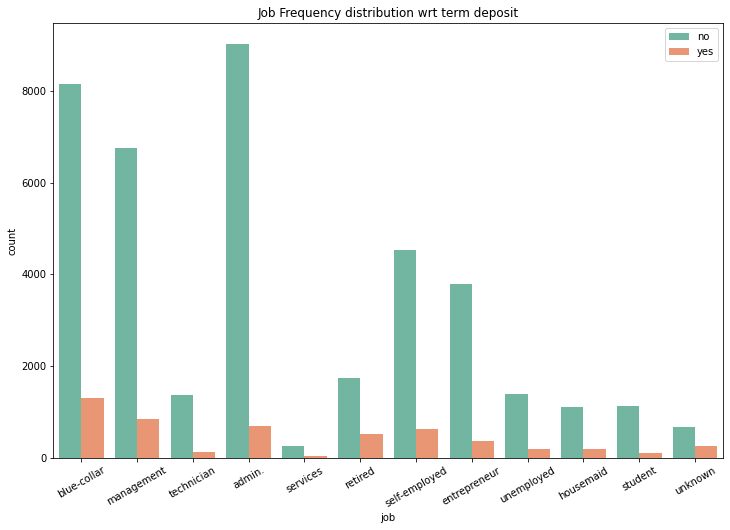

In [16]:
f, ax = plt.subplots(figsize=(12, 8))
sn = sns.countplot(x="job", hue="termdeposit", data=Term, palette="Set2")
sn.set_title("Job Frequency distribution wrt term deposit")
sn.set_xticklabels(Term.job.value_counts().index, rotation=30)
sn.legend(loc='upper right')
plt.show()

## marital

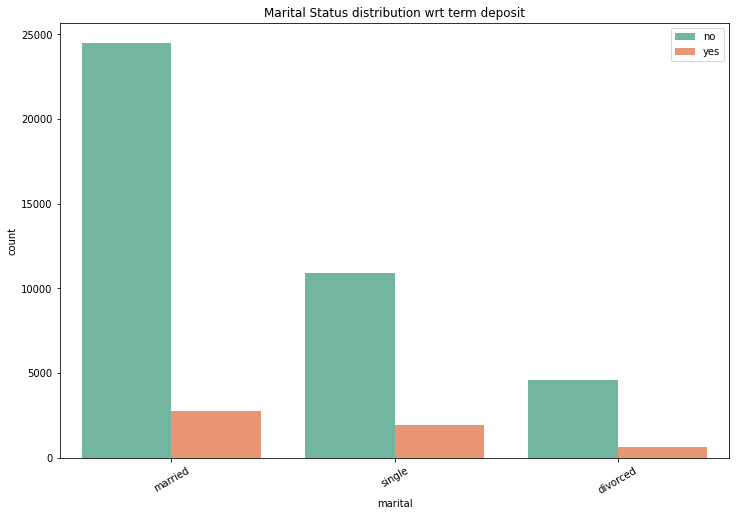

In [17]:
f, ax = plt.subplots(figsize=(12, 8))
sn = sns.countplot(x="marital", hue="termdeposit", data=Term, palette="Set2")
sn.set_title("Marital Status distribution wrt term deposit")
sn.set_xticklabels(Term.marital.value_counts().index, rotation=30)
sn.legend(loc='upper right')
plt.show()

## education

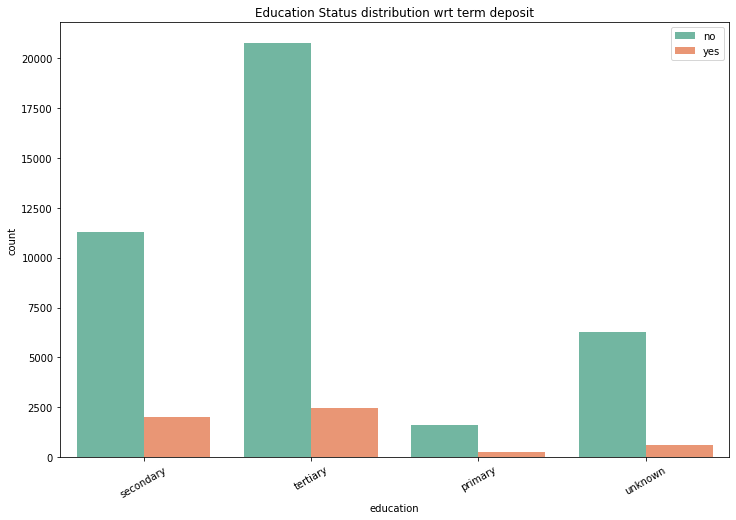

In [18]:
f, ax = plt.subplots(figsize=(12, 8))
sn = sns.countplot(x="education", hue="termdeposit", data=Term, palette="Set2")
sn.set_title("Education Status distribution wrt term deposit")
sn.set_xticklabels(Term.education.value_counts().index, rotation=30)
sn.legend(loc='upper right')
plt.show()

## credit

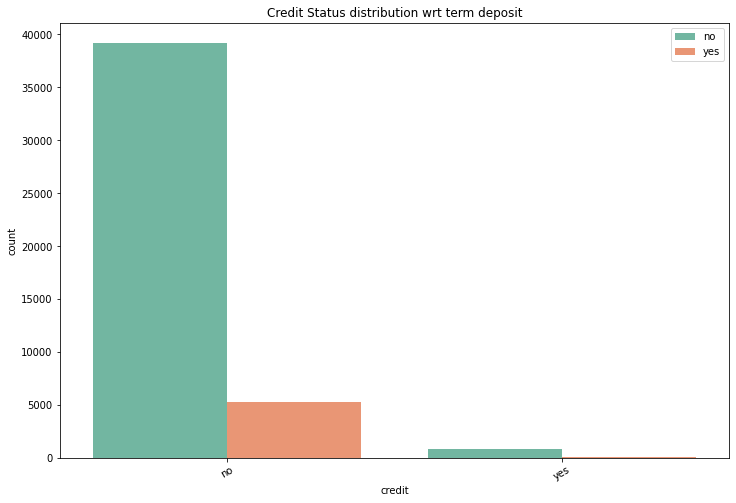

In [19]:
f, ax = plt.subplots(figsize=(12, 8))
sn = sns.countplot(x="credit", hue="termdeposit", data=Term, palette="Set2")
sn.set_title("Credit Status distribution wrt term deposit")
sn.set_xticklabels(Term.credit.value_counts().index, rotation=30)
sn.legend(loc='upper right')
plt.show()

## housingloan

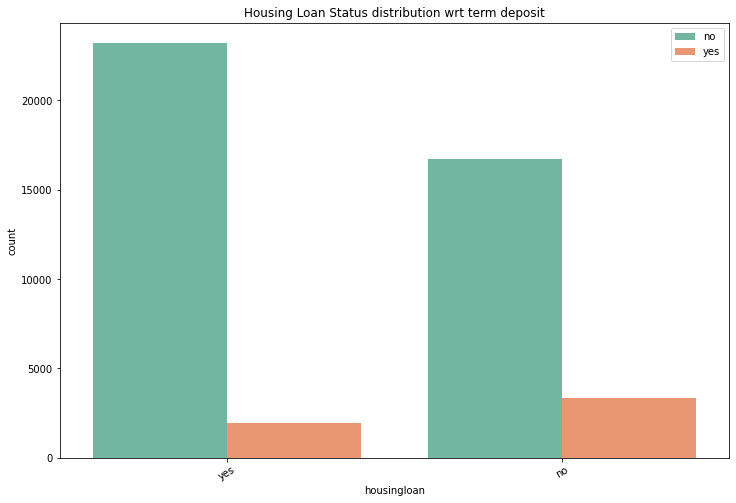

In [20]:
f, ax = plt.subplots(figsize=(12, 8))
sn = sns.countplot(x="housingloan", hue="termdeposit", data=Term, palette="Set2")
sn.set_title("Housing Loan Status distribution wrt term deposit")
sn.set_xticklabels(Term.housingloan.value_counts().index, rotation=30)
sn.legend(loc='upper right')
plt.show()

## personalloan

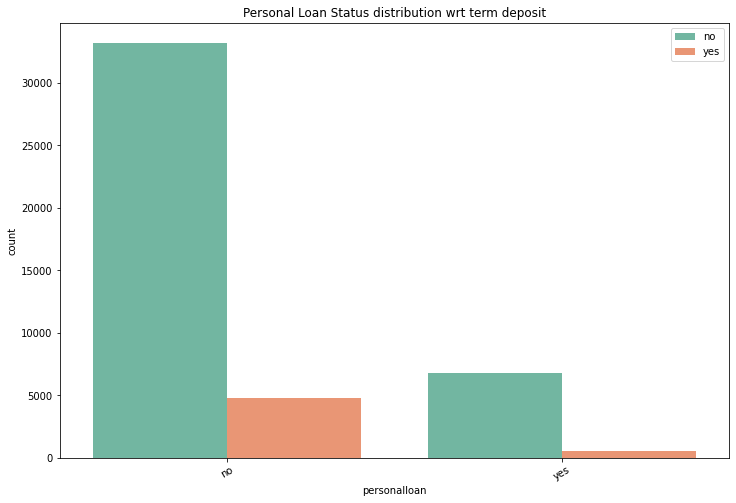

In [21]:
f, ax = plt.subplots(figsize=(12, 8))
sn = sns.countplot(x="personalloan", hue="termdeposit", data=Term, palette="Set2")
sn.set_title("Personal Loan Status distribution wrt term deposit")
sn.set_xticklabels(Term.personalloan.value_counts().index, rotation=30)
sn.legend(loc='upper right')
plt.show()

## contact

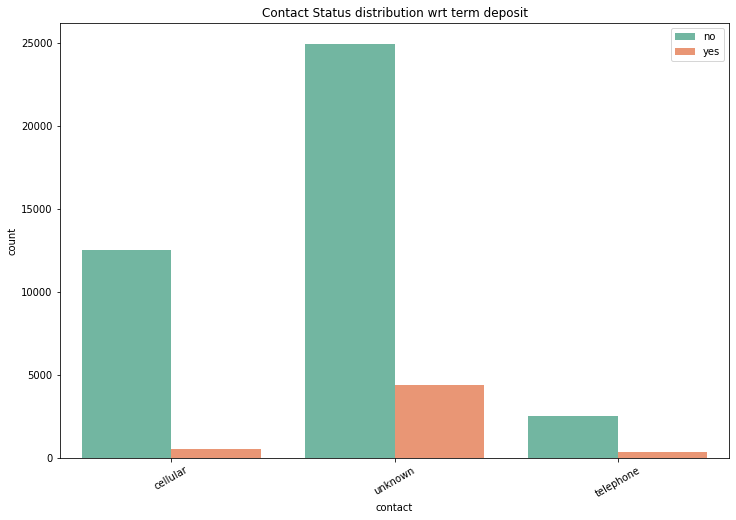

In [22]:
f, ax = plt.subplots(figsize=(12, 8))
sn = sns.countplot(x="contact", hue="termdeposit", data=Term, palette="Set2")
sn.set_title("Contact Status distribution wrt term deposit")
sn.set_xticklabels(Term.contact.value_counts().index, rotation=30)
sn.legend(loc='upper right')
plt.show()

## month

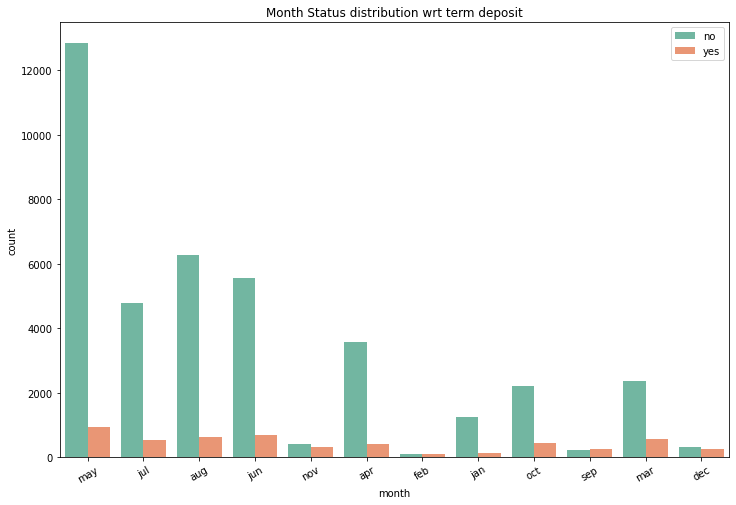

In [23]:
f, ax = plt.subplots(figsize=(12, 8))
sn = sns.countplot(x="month", hue="termdeposit", data=Term, palette="Set2")
sn.set_title("Month Status distribution wrt term deposit")
sn.set_xticklabels(Term.month.value_counts().index, rotation=30)
sn.legend(loc='upper right')
plt.show()

## We can see that most calls were made in May month and least were made in December month. That's a good information because now we can focus that in which month we need to approach the clients the most.

## Previous contacts vs termdeposit

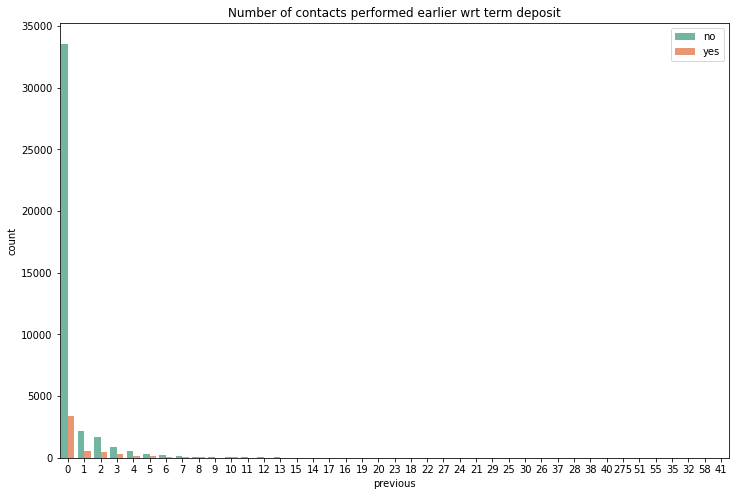

In [24]:
f, ax = plt.subplots(figsize=(12, 8))
sn = sns.countplot(x="previous", hue="termdeposit", data=Term, palette="Set2")
sn.set_title("Number of contacts performed earlier wrt term deposit")
sn.set_xticklabels(Term.previous.value_counts().index)
sn.legend(loc='upper right')
plt.show()

## Poutcome Status

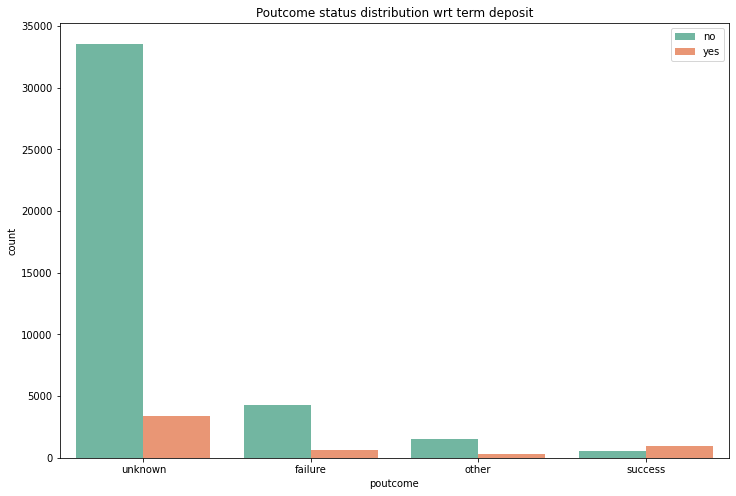

In [25]:
f, ax = plt.subplots(figsize=(12, 8))
sn = sns.countplot(x="poutcome", hue="termdeposit", data=Term, palette="Set2")
sn.set_title("Poutcome status distribution wrt term deposit")
sn.set_xticklabels(Term.poutcome.value_counts().index)
sn.legend(loc='upper right')
plt.show()

## Check Age Ditribution

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of age')

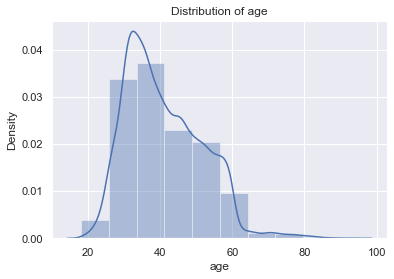

In [26]:
sns.set()
age_plot = sns.distplot(Term['age'], bins=10)
age_plot.set_title('Distribution of age')

## Most of the customers are of 30-50 years of age group.

## Check Pdays Distribution

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of pdays')

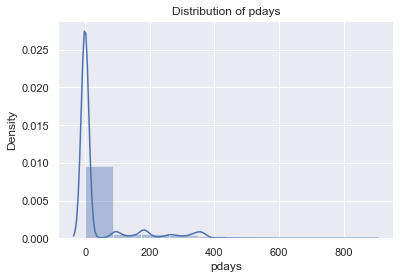

In [27]:
sns.set()
age_plot = sns.distplot(Term['pdays'], bins=10)
age_plot.set_title('Distribution of pdays')

## Encoding target variable

In [28]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
Term['termdeposit'] = encoder.fit_transform(Term['termdeposit'])

In [29]:
Term.head()

,age,job,marital,education,credit,balance,housingloan,personalloan,contact,day,month,duration,campaign,pdays,previous,poutcome,termdeposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


## Finding the relations between the variables.

<AxesSubplot:>

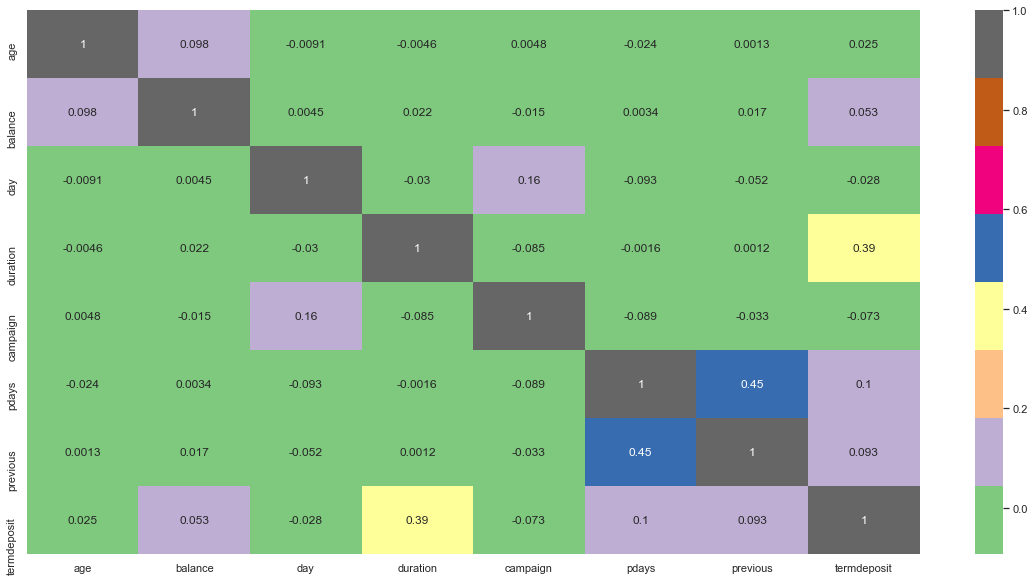

In [30]:
sns.set()
plt.figure(figsize=(20, 10))
c = Term.corr()
sns.heatmap(c, cmap="Accent", annot=True)

## Since we do not need the information of when the customer was contacted, we will drop these features from the analysis. Also, poutcome maximum impact was for 'unknown'. So we will remove that from our dataset as well.

In [31]:
Term.drop(['age', 'day', 'previous', 'campaign', 'contact', 'poutcome', ], axis=1, inplace=True)

## Since duration is only co-related with o/p variable, we will remove others from further analysis.

## Seperating predictors and target variable

In [32]:
X = Term[['balance', 'pdays', 'job', 'marital', 'education', 'credit', 'housingloan', 'personalloan','month', 'duration']]
Y = Term[['termdeposit']]

## Feature Engineering
## We need to encode the categorical variables to train the model
## We can see that all the variables are ordinal categorical data type hence we will use get_dummies on pandas dataframe.


In [33]:
encoder_1 = LabelEncoder()

ordinalList = ['education', 'credit', 'housingloan', 'personalloan']

for i in ordinalList:
    X[i] = encoder_1.fit_transform(X[i])

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
# Dummy encoding using get_dummies

X = pd.get_dummies(X, columns=['job', 'marital', 'month'], drop_first=True)

In [35]:
cat_variables = X.drop(['balance', 'pdays', 'duration'], axis=1)

In [36]:
# Select from categorical variables
from sklearn.feature_selection import SelectKBest, chi2  # for chi-squared feature selection

sf = SelectKBest(chi2, k='all')
sf_fit = sf.fit(cat_variables, Y)

In [37]:
# print feature scores
for i in range(len(sf_fit.scores_)):
    print(' %s: %f' % (cat_variables.columns[i], sf_fit.scores_[i]))

 education: 90.617723
 credit: 22.313875
 housingloan: 388.949715
 personalloan: 176.516137
 job_blue-collar: 184.348135
 job_entrepreneur: 16.903979
 job_housemaid: 10.152196
 job_management: 38.743601
 job_retired: 269.699331
 job_self-employed: 0.031898
 job_services: 31.876642
 job_student: 261.792961
 job_technician: 3.026332
 job_unemployed: 18.254702
 job_unknown: 0.003196
 marital_married: 65.352757
 marital_single: 130.835717
 month_aug: 2.839233
 month_dec: 254.219350
 month_feb: 62.816516
 month_jan: 3.379053
 month_jul: 45.292910
 month_jun: 11.259182
 month_mar: 749.691937
 month_may: 330.368818
 month_nov: 9.201705
 month_oct: 734.708162
 month_sep: 677.273004


In [38]:
dfscores = pd.DataFrame(sf_fit.scores_)
dfcolumns = pd.DataFrame(cat_variables.columns)

In [39]:
# concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']  # naming the dataframe columns
print(featureScores.nlargest(12, 'Score'))  # print 10 best features

              Specs       Score
23        month_mar  749.691937
26        month_oct  734.708162
27        month_sep  677.273004
2       housingloan  388.949715
24        month_may  330.368818
8       job_retired  269.699331
11      job_student  261.792961
18        month_dec  254.219350
4   job_blue-collar  184.348135
3      personalloan  176.516137
16   marital_single  130.835717
0         education   90.617723


/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


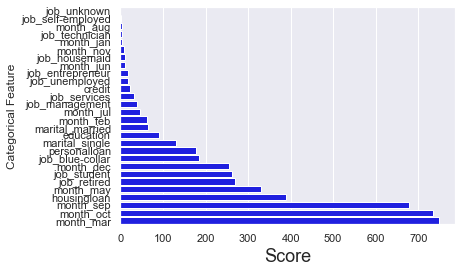

In [40]:
# plot the scores
datset = pd.DataFrame()
datset['feature'] = cat_variables.columns[range(len(sf_fit.scores_))]
datset['scores'] = sf_fit.scores_
datset = datset.sort_values(by='scores', ascending=True)
sns.set()
sns.barplot(datset['scores'], datset['feature'], color='blue')
sns.set_style('whitegrid')
plt.ylabel('Categorical Feature')
plt.xlabel('Score', fontsize=18)
plt.show()

## We will keep only highest scored categorical predictors

In [41]:
X = X[['balance', 'pdays', 'duration', 'month_mar', 'month_oct', 'month_sep', 'housingloan',
       'month_may', 'job_retired', 'job_student', 'month_dec', 'job_blue-collar', 'personalloan']]

## Since data is imbalanced hence we need to balance it.

In [42]:
#conda install -c conda-forge imbalanced-learn

In [43]:
from imblearn.over_sampling import SMOTE

## Implementing over-sampling for handling imbalanced data

In [44]:
smote = SMOTE(random_state=0)
X_res, y_res = smote.fit_resample(X, Y)

In [45]:
## Let's see how the data changed after sampling

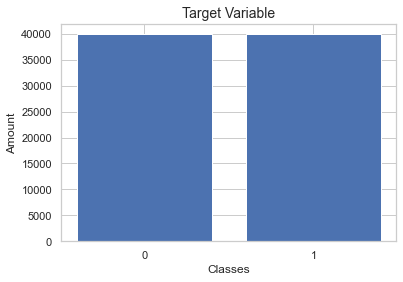

In [46]:
plt.bar(['0', '1'], y_res.termdeposit.value_counts().values)
plt.title('Target Variable', fontsize=14)
plt.xlabel('Classes')
plt.ylabel('Amount')
plt.show()

## Splitting data into separate training and test set

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.4, random_state=0)

In [50]:
# check the shape of X_train and X_test
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(31938, 1)

## Feature Scaling

In [51]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

## create a dictionary of all values we want to hypertune

In [55]:
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': np.arange(3, 15), 'min_samples_split': [2, 3, 4]}

In [56]:
# decision tree model
dtree_model = DecisionTreeClassifier(random_state=200)

## use gridsearch to test all values

In [57]:
grid_search_cv = GridSearchCV(dtree_model, param_grid, cv=10)
grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=200),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_split': [2, 3, 4]})

## Once we have fit the grid search cv model with training data, we will simply ask what worked best for us
## Get the best parameters

In [58]:
grid_search_cv.best_params_

{'criterion': 'gini', 'max_depth': 12, 'min_samples_split': 3}

## Creating decision tree model with best parameters

In [59]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=12, min_samples_split=3)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

## Check model accuracy

In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [64]:
cm = confusion_matrix(y_test, y_pred)

In [66]:
# Check accuracy score
import sklearn.metrics as metrics

acc_dt = metrics.accuracy_score(y_pred, y_test)
print('The accuracy of the Decision Tree is', acc_dt)

The accuracy of the Decision Tree is 0.8565345356628468


In [67]:
cm

array([[12908,  2931],
       [ 1651, 14448]])

In [68]:
from sklearn.metrics import f1_score
print("F1 score:", f1_score(y_pred, y_test))

F1 score: 0.8631339984467411


## Random Forest

In [69]:
# Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

## create a dictionary of all values we want to hypertune

In [70]:
param_grid_random = {'criterion': ['gini', 'entropy'], 'max_depth': np.arange(3, 15), 'min_samples_split': [2, 3, 4],
                     'n_estimators': np.arange(10, 20)}


In [71]:
# random forest tree model
rforest_model = RandomForestClassifier()

## use RandomizedSearchCV to test all values

In [72]:
ran_grid_search_cv = RandomizedSearchCV(rforest_model, param_grid_random, cv=10, n_iter=100, random_state=150)
ran_grid_search_cv.fit(X_train, np.ravel(y_train))

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_samples_split': [2, 3, 4],
                                        'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])},
                   random_state=150)

## Once we have fit the RandomizedSearchCV model with training data, we will simply ask what worked best for us
## Get the best parameters

In [73]:
ran_grid_search_cv.best_params_

{'n_estimators': 17,
 'min_samples_split': 4,
 'max_depth': 14,
 'criterion': 'entropy'}

## Creating random forest tree model with best parameters

In [74]:
rf = RandomForestClassifier(criterion='gini', max_depth=14, min_samples_split=3, n_estimators=12)
rf.fit(X_train, np.ravel(y_train))
y_pred = rf.predict(X_test)

In [75]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[13027  2812]
 [ 1580 14519]]


In [76]:
# Check accuracy
import sklearn.metrics as metrics

acc_rf = metrics.accuracy_score(y_pred, y_test)
print('The accuracy of the Random Forest Tree is', acc_rf)

The accuracy of the Random Forest Tree is 0.8624835619011836


## Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

In [78]:
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.383214
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.447     
Dependent Variable: termdeposit      AIC:              36742.4823
Date:               2021-10-12 17:40 BIC:              36856.5833
No. Observations:   47906            Log-Likelihood:   -18358.   
Df Model:           12               LL-Null:          -33205.   
Df Residuals:       47893            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-------------------------------------------------------------------
          Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
x1        0.0474     0.0130     3.6486   0.0003    0.0220    0.0729
x2        0.5952     0.0148    40.2355   0.0000    0.5662 

## Now we will do model fitting

In [81]:
lr_model = LogisticRegression()
lr_model.fit(X_test, y_test)
y_pred=lr_model.predict(X_test)
acc_lg = lr_model.score(X_test, y_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(acc_lg))

Accuracy of logistic regression classifier on test set: 0.84


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [82]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[12982  2857]
 [ 2101 13998]]


In [83]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84     15839
           1       0.83      0.87      0.85     16099

    accuracy                           0.84     31938
   macro avg       0.85      0.84      0.84     31938
weighted avg       0.85      0.84      0.84     31938



In [84]:
from sklearn.metrics import f1_score
print("F1 score:", f1_score(y_pred, y_test))

F1 score: 0.8495478545851792


## Comparison of models

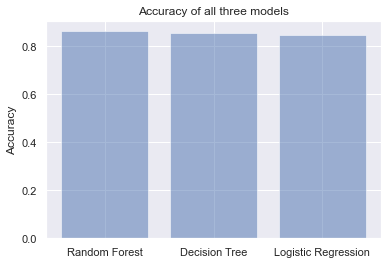

In [86]:
# We will plot bar chart of all three models for comparison
accuracy = [acc_rf, acc_dt, acc_lg]
names = ('Random Forest', 'Decision Tree', 'Logistic Regression')
sns.set()
y_pos = np.arange(len(accuracy))
plt.bar(y_pos, accuracy, align='center', alpha=0.5)
plt.xticks(y_pos, names)
plt.ylabel('Accuracy')
plt.title('Accuracy of all three models')
plt.show()